In [21]:
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [11]:
boston = load_boston()
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


C:\Users\GSENR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X = df_boston.loc[: , 'CRIM':'LSTAT']
y = boston.target

print('정규화 확장 전 데이터 셋  : ', X.shape, y.shape)

정규화 확장 전 데이터 셋  :  (506, 13) (506,)


In [16]:
normalize_X = MinMaxScaler().fit_transform(X)
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X)

print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화, 추가 생성 :  (506, 104) (506,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(ex_X,y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print('훈련 데이터 세트 점수 {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터 세트 점수 {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 0.94
테스트 데이터 세트 점수 0.78


In [24]:
ridge = Ridge().fit(X_train,y_train)
print(ridge)
print('훈련 데이터 세트 점수 {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 데이터 세트 점수 {:.2f}'.format(ridge.score(X_test, y_test)))

Ridge()
훈련 데이터 세트 점수 0.87
테스트 데이터 세트 점수 0.81


In [26]:
ridge10= Ridge(alpha=10).fit(X_train,y_train)
print(ridge10)
print('훈련 데이터 세트 점수 {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 데이터 세트 점수 {:.2f}'.format(ridge10.score(X_test, y_test)))

Ridge(alpha=10)
훈련 데이터 세트 점수 0.77
테스트 데이터 세트 점수 0.73


In [27]:
ridge01= Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge01)
print('훈련 데이터 세트 점수 {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 데이터 세트 점수 {:.2f}'.format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1)
훈련 데이터 세트 점수 0.92
테스트 데이터 세트 점수 0.82


In [28]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

In [29]:
ridge_p = [10, 5, 1, 0.1, 0.01]

for i in ridge_p:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    
    print("alpha : {}".format(i))
    print("훈련 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

alpha : 10
훈련 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73
alpha : 5
훈련 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.76
alpha : 1
훈련 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81
alpha : 0.1
훈련 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82
alpha : 0.01
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
lr = LinearRegression().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge100 = Ridge(alpha=100).fit(X_train, y_train)

Text(0.5, 1.0, 'Ridge alpha=0.01')

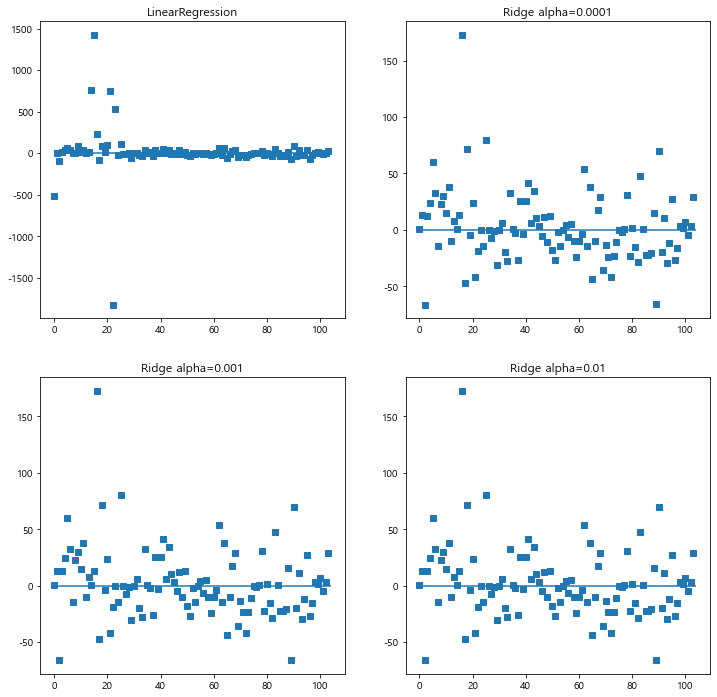

In [32]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.hlines(0,0,len(lr.coef_))
plt.plot(lr.coef_,'s', label="LinearRegression")
plt.title("LinearRegression")

plt.subplot(2,2,2)
plt.hlines(0,0,len(ridge0001.coef_))
plt.plot(ridge0001.coef_,'s', label="Ridge alpha=0.0001")
plt.title("Ridge alpha=0.0001")

plt.subplot(2,2,3)
plt.hlines(0,0,len(ridge001.coef_))
plt.plot(ridge0001.coef_,'s', label="Ridge alpha=0.001")
plt.title("Ridge alpha=0.001")

plt.subplot(2,2,4)
plt.hlines(0,0,len(ridge01.coef_))
plt.plot(ridge0001.coef_,'s', label="Ridge alpha=0.01")
plt.title("Ridge alpha=0.01")

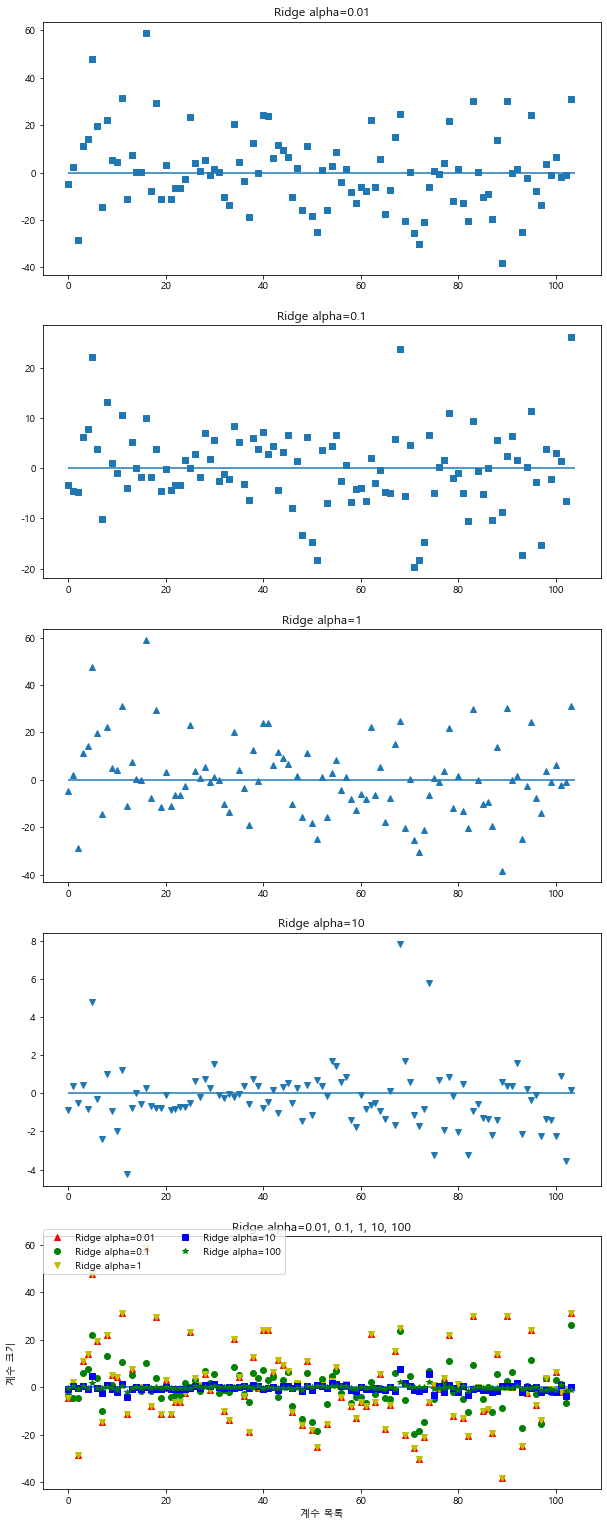

In [43]:
fig = plt.figure(figsize=(10,27))
# ax1 = fig.add_subplot(5, 1, 1)
# ax2 = fig.add_subplot(5, 1, 2)
# ax3 = fig.add_subplot(5, 1, 3)
# ax4 = fig.add_subplot(5, 1, 4)
# ax5 = fig.add_subplot(5, 1, 5)
plt.subplot(5, 1, 1)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_,'s',label='Ridge alpha=0.01')
plt.title('Ridge alpha=0.01')

plt.subplot(5, 1, 2)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(5, 1, 3)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(5, 1, 4)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

plt.subplot(5, 1, 5)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 'r^', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'go', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'bs', label="Ridge alpha=10")
plt.plot(ridge100.coef_, 'g*', label="Ridge alpha=100")
plt.title('Ridge alpha=0.01, 0.1, 1, 10, 100')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0,0.85))
plt.show()

C:\Users\GSENR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

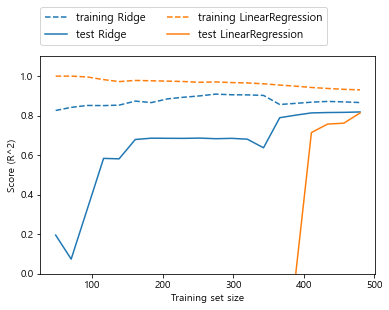

In [44]:
mglearn.plots.plot_ridge_n_samples()